## CPE 695 HWK 1 Programming Problem  --- Yuhui Ren

#### In this problem, we write a program to estimate the parameters for an unknown polynomial using the polyfit() function of the numpy package.

#### 1) Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 2, 3, 4, 5, 6.

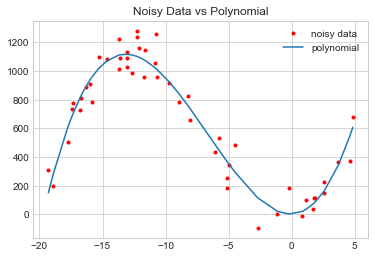

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)

polynomial = np.polyfit(x[:,0], y[:,0], 3)  # Here, 3 is chosen for m    # the coefficients
y_polynomial = np.poly1d(polynomial)   # the function equation

plt.plot(x, y, 'ro', label='noisy data', markersize=3)
plt.plot(sorted(list(x[:,0])), y_polynomial(sorted(list(x[:,0]))), label='polynomial', markersize=3)

plt.legend() 
plt.title('Noisy Data vs Polynomial')
plt.show() 

#### 2) Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m.

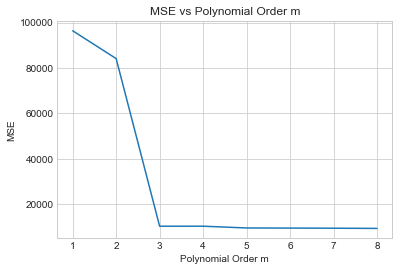

In [5]:
from sklearn.metrics import mean_squared_error

mse = []
m_list = range(1,9)

for m in m_list:
    polynomial = np.polyfit(x[:,0], y[:,0], m)
    y_polynomial = np.poly1d(polynomial)
    mse_m = mean_squared_error(y, y_polynomial(x))
    mse.append(mse_m)

plt.plot(m_list, mse)
plt.title('MSE vs Polynomial Order m')
plt.xlabel('Polynomial Order m')
plt.ylabel('MSE')
plt.show()

Answer: From the above figure (MSE vs Polynomial Order m), we can observe that MSE keeps decreasing when polynomial order m increases from 1 to 3, but MSE does not decrease anymore when m increases from 3 to 8. So the best choice of m should be 3. 

#### 3) Change variable noise_scale to 150, 200, 400, 600, 1000 respectively, re-run the algorithm and plot the polynomials with the m found in 2). Discuss the impact of noise scale to the accuracy of the returned parameters. [You need to plot a figure like in 1) for each choice of noise_scale.]

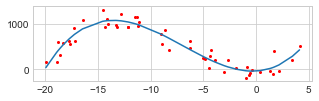

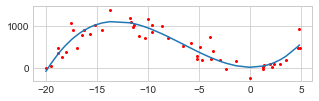

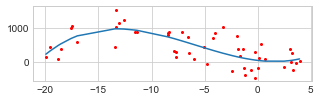

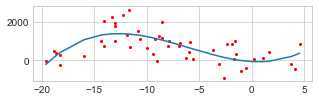

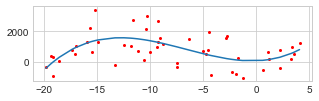

In [75]:
import warnings
warnings.filterwarnings("ignore")

noise_scales = [150, 200, 400, 600, 1000]
number_of_samples = 50

np.random.seed(420)

for noise_scale in noise_scales:

    x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)

    polynomial = np.polyfit(x[:,0], y[:,0], 3)  # from the 2nd question, we know m is 3    
    y_polynomial = np.poly1d(polynomial) 
    
    plt.figure(figsize=(5,8))
    plt.subplot(5,1,noise_scales.index(noise_scale)+1)
    plt.plot(x, y, 'ro', label='noisy data', markersize=2)
    plt.plot(sorted(list(x[:,0])), y_polynomial(sorted(list(x[:,0]))), label='polynomial', markersize=3)

Answer: 
In the 1st subplot, the noise scale is 150, and the noisy data are very close to the polynomial curve. Through the 2nd, 3rd, 4th until the 5th subplot, we can notice that the noisy data are becoming more far away from the polynomial curve.

#### 4) Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot the polynomials with the m found in 2). Discuss the impact of the number of samples to the accuracy of the returned parameters. [You need to plot a figure like in 1) for each choice of number_of_samples.]

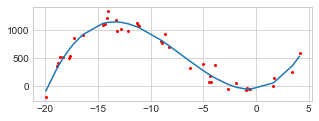

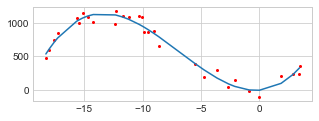

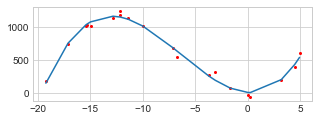

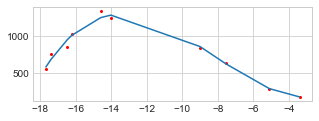

In [76]:
numbers_of_samples = [40, 30, 20, 10]
noise_scale = 100 

np.random.seed(420)

for number_of_samples in numbers_of_samples:

    x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)

    polynomial = np.polyfit(x[:,0], y[:,0], 3)  # from the 2nd question, we know m is 3    
    y_polynomial = np.poly1d(polynomial) 
    
    plt.figure(figsize=(5,8))
    plt.subplot(4,1,numbers_of_samples.index(number_of_samples)+1)
    plt.plot(x, y, 'ro', label='noisy data', markersize=2)
    plt.plot(sorted(list(x[:,0])), y_polynomial(sorted(list(x[:,0]))), label='polynomial', markersize=3)

Answer: In the 1st subplot, the 40 noisy data give the best polynomial curve. But in the 4th subplot, the only 10 noisy data give the worst curve.